## Driving question

> What is the reality of marijuana citations and arrests in Pittsburgh?

Since the passage of the 2015 City Ordinance decriminalizing marijuana, what are the trends of arrests and citations in the Pittsburgh area? For example, what were the demographic and geographic characteristics of these events?

## Analysis summary

TBD

## Data sources

We downloaded data covering 2016–2023 from these sources, included as CSV files referenced below.

[Pittsburgh Arrest Data](https://data.wprdc.org/dataset/arrest-data/resource/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f?inner_span=True), [Data Dictionary](https://data.wprdc.org/dataset/arrest-data/resource/e554650d-f48f-49b2-88f3-e19878a1c245?inner_span=True)

[Pittsburgh Police Non-Traffic Citation Data](https://data.wprdc.org/dataset/non-traffic-citations/resource/6b11e87d-1216-463d-bbd3-37460e539d86), [Data Dictionary](https://data.wprdc.org/dataset/non-traffic-citations/resource/ec71e915-cd01-4281-86c0-2d3a06701616)

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_notebook
from bokeh.io import push_notebook

Matplotlib is building the font cache; this may take a moment.


In [ ]:
# Reading a CSV file from a GitHub repository URL into a pandas DataFrame
# 'low_memory=False' is used to prevent pandas from guessing data types in chunks, which can cause issues with mixed data types.
url = 'https://raw.githubusercontent.com/Police-Data-Accessibility-Project/caasi-help-desk/main/mj-decriminalization/analysis/grief%20to%20action/arrests_citations_merged_data.csv'
mj_data_df = pd.read_csv(url, low_memory=False)

In [5]:
# Read the CSV files from the same directory as this notebook instead of the GitHub repo

In [ ]:
# Further reduce the size of the data frame by keeping only necessary columns

In [ ]:
# Combine arrests and citations into one data frame, retaining the record type as its own column

In [ ]:
# Strip out non-marijuana rows from the combined data frame

In [ ]:
# Add a column labeling rows which only involve marijuana arrests, or have other arrest causes

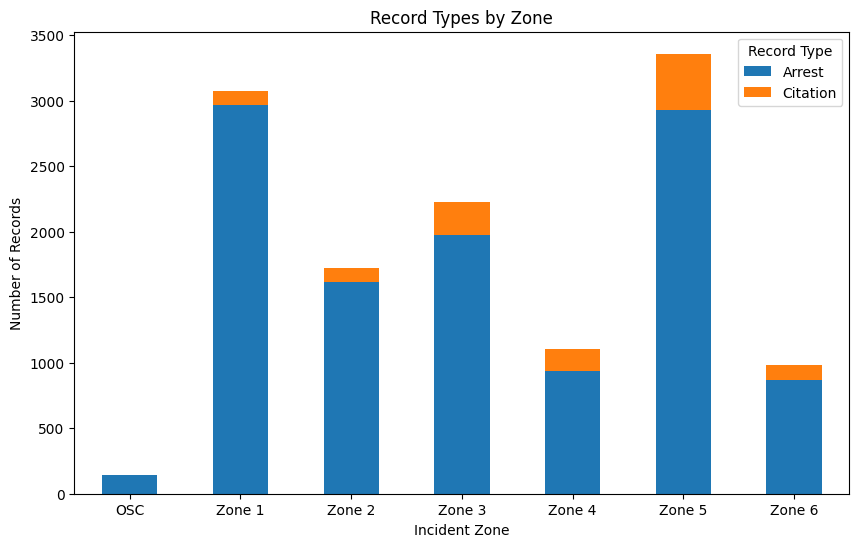

In [6]:
# Example chart to be deleted

# Grouping the data by INCIDENTZONE and record_type and counting occurrences
zone_record_counts = mj_data_df.groupby(['INCIDENTZONE', 'record_type']).size().unstack()

# Plotting the bar chart
zone_record_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Record Types by Zone')
plt.xlabel('Incident Zone')
plt.ylabel('Number of Records')
plt.xticks(rotation=0)  # Keeping x-axis labels horizontal
plt.legend(title='Record Type')
plt.show()